In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import function
import matplotlib.colors as mcolors
from netCDF4 import Dataset
file='E:\\data\\oras5\\somali-oras5\\no_cycle_MLD_every_term_climate.nc';ds = xr.open_dataset(file);
ild=ds.ild; mld=ds.mld;
mlt=ds.mlt; T_n=ds.T_n;
mlu=ds.mlu; mlv=ds.mlv;
Qnet=ds.Qnet; Qpen=ds.Qpen; Q=ds.Q;
He_24=ds.He_24;
mask=ds.mask;
mlt_tend=ds.mlt_tend;
dhdt=ds.dhdt; wsgn=ds.wsgn;ver_adv=ds.ver_adv; Wh=ds.Wh
VER=ds.VER
lon=ds.longitude;lat=ds.latitude

D:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


C:\Users\panhong\AppData\Local\Temp\ipykernel_16776\4056569168.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i,j].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May.','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'],fontsize=8)


[Text(1, 0, 'Jan.'),
 Text(2, 0, 'Feb.'),
 Text(3, 0, 'Mar.'),
 Text(4, 0, 'Apr.'),
 Text(5, 0, 'May.'),
 Text(6, 0, 'Jun.'),
 Text(7, 0, 'Jul.'),
 Text(8, 0, 'Aug.'),
 Text(9, 0, 'Sep.'),
 Text(10, 0, 'Oct.'),
 Text(11, 0, 'Nov.'),
 Text(12, 0, 'Dec.')]

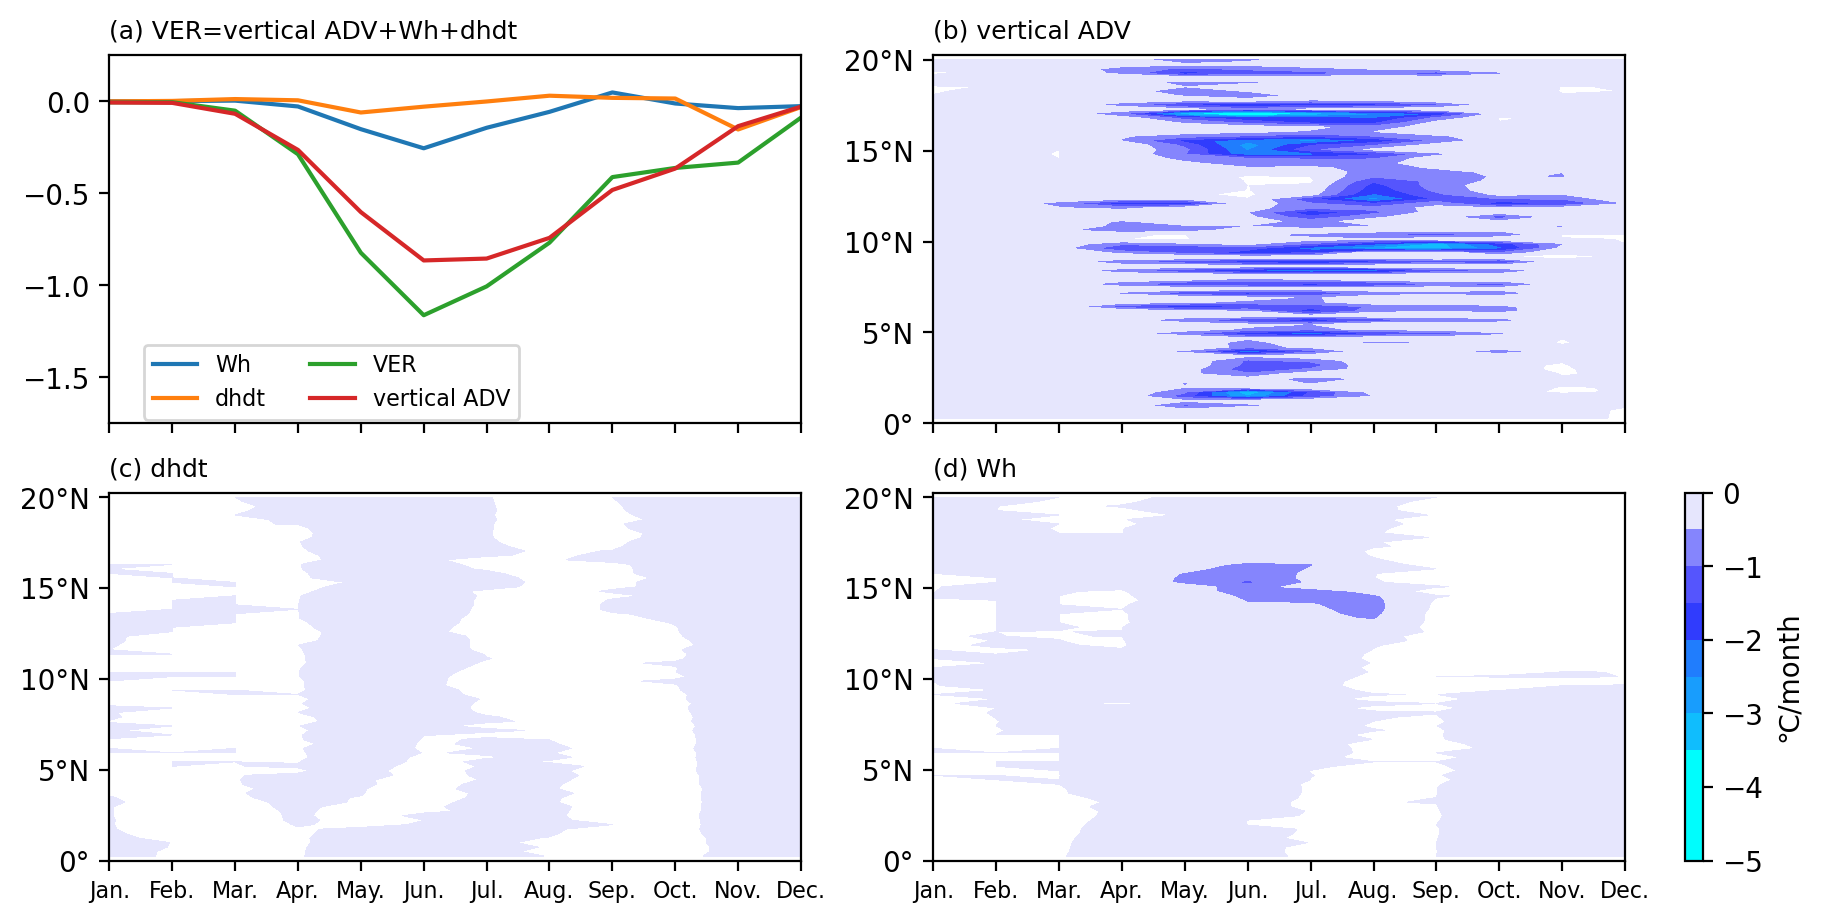

In [2]:
'''fig8'''
import colormaps as cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
levels=np.arange(-5,0.25,0.5);colors=cmaps.cmp_flux#GMT_jet;
a=4
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 4.5), dpi=200, sharex=True,constrained_layout=True)#sharey=True,
label=['a','b','c','d']
i,j=0,0;data= VER;
axs[i,j].plot(data.time,(Wh+mask).mean('longitude').mean('latitude'),label='Wh')
axs[i,j].plot(data.time,(dhdt+mask).mean('longitude').mean('latitude'),label='dhdt')
axs[i,j].plot(data.time,(VER+mask).mean('longitude').mean('latitude'),label='VER')
axs[i,j].plot(data.time,(ver_adv+mask).mean('longitude').mean('latitude'),label='vertical ADV')
axs[i,j].set_ylim([-1.75,0.25])
axs[i,j].legend(loc=[0.05,0.01],ncol=2,fontsize=8)
axs[i,j].set_title(f'({label[int(i+j)]}) VER=vertical ADV+Wh+dhdt',fontsize=9,loc='left')

i,j=0,1;data=ver_adv;
cf=axs[i,j].contourf(data.time,data.latitude,(data+mask).mean('longitude').T,cmap=colors,levels=levels);
cf.set_clim(vmin=-abs(a), vmax=abs(a))
axs[i,j].set_title(f'({label[int(i+j)]}) vertical ADV',fontsize=9,loc='left');
axs[i,j].yaxis.set_major_formatter(LatitudeFormatter())

i,j=1,1;data= Wh;
cf=axs[i,j].contourf(data.time,data.latitude,(data+mask).mean('longitude').T,cmap=colors,levels=levels);
cf.set_clim(vmin=-abs(a), vmax=abs(a))
axs[i,j].set_title(f'({label[int(i+j+1)]}) Wh',fontsize=9,loc='left')
axs[i,j].yaxis.set_major_formatter(LatitudeFormatter())
fig.colorbar(cf,label='℃/month')
axs[i,j].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May.','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'],fontsize=8)

i,j=1,0;data=dhdt;
cf=axs[i,j].contourf(data.time,data.latitude,(data+mask).mean('longitude').T,cmap=colors,levels=levels);
cf.set_clim(vmin=-abs(a), vmax=abs(a))
axs[i,j].set_title(f'({label[int(i+j+1)]}) dhdt',fontsize=9,loc='left')
axs[i,j].set_xticks(np.arange(1, 13, 1))
axs[i,j].yaxis.set_major_formatter(LatitudeFormatter())
axs[i,j].set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May.','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'],fontsize=8)

In [3]:
'''ADV'''
'''Unit：℃/month'''
file1="E:\data\era5\era5_40~80E_uwind_vwind_at_evap_lhf_lwr_swr_shf_sst-1980-2023.nc";ds1=xr.open_dataset(file1);ds1=ds1.msnswrf
time=ds1.time[0:12];latitude=mlt.latitude;longitude=mlt.longitude
sal= xr.DataArray(mlt.data, coords=[time,latitude,longitude],dims=['time', 'lat','lon']);lat=sal.lat;lon=sal.lon;
int_U= xr.DataArray(mlu, coords=[time,latitude,longitude],dims=['time', 'lat','lon'])
int_V= xr.DataArray(mlv, coords=[time,latitude,longitude],dims=['time', 'lat','lon'])
from advection_rd_ml import advection_rd_ml
mnadv_climU,mnadv_climV,ekman,T1,h_eddy=advection_rd_ml(sal,lat,lon,time,int_U,int_V,1,-1)
adv_u=mnadv_climU.rename({'month': 'time','lat':'latitude','lon':'longitude'})*86400*30.41*-1;
adv_v=mnadv_climV.rename({'month': 'time','lat':'latitude','lon':'longitude'})*86400*30.41*-1

C:\Users\panhong\AppData\Local\Temp\ipykernel_16776\2145023028.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'],fontsize = 'small')


D:\anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


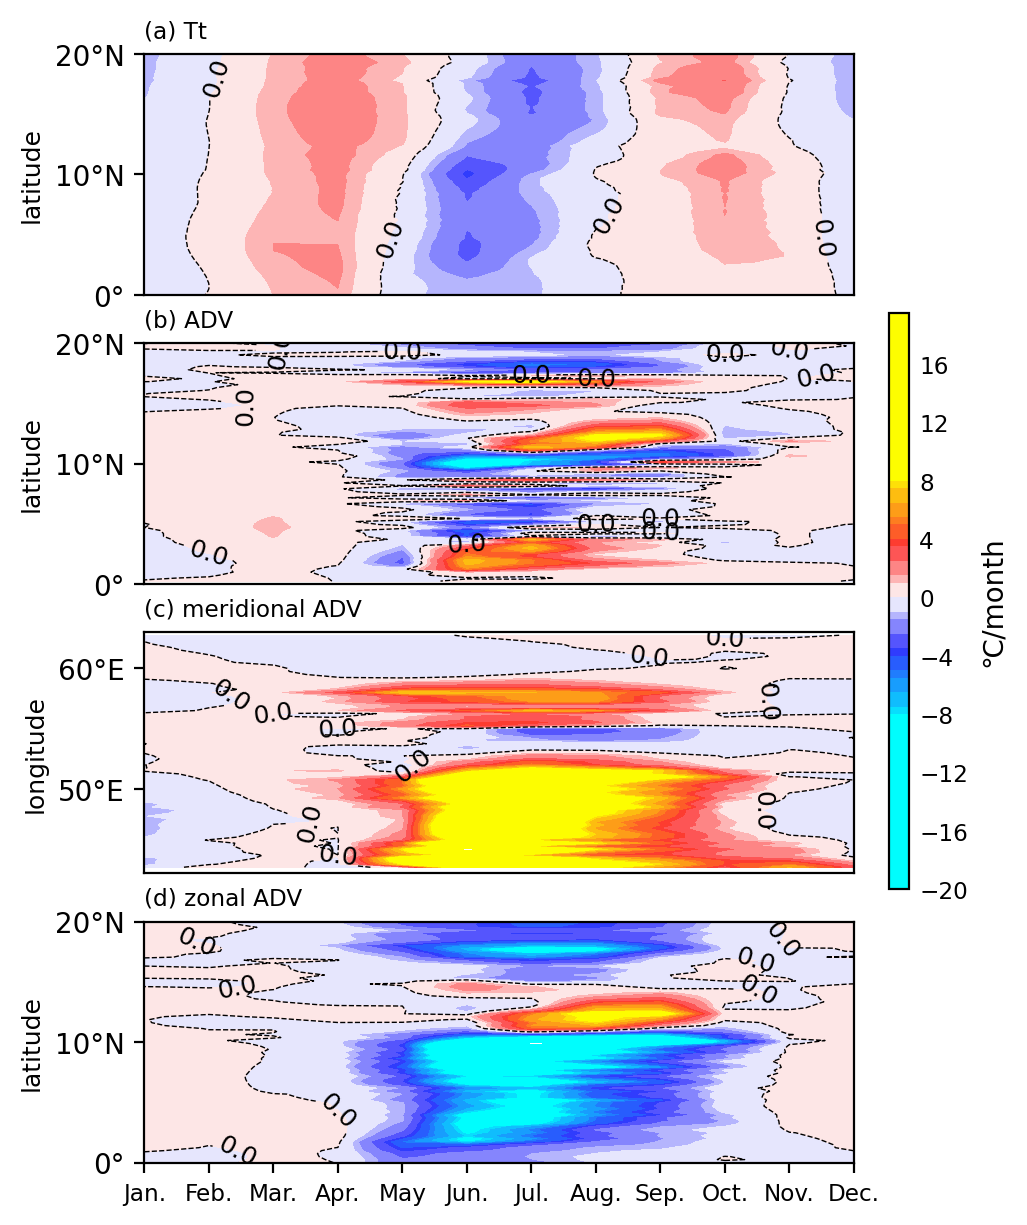

In [8]:
'''fig7'''
'''Unit：℃/month'''
new_time_values = [1,2,3,4,5,6,7,8,9,10,11,12];new_time_values1 = np.arange(1.5, 13.5, 1)
NSHF=(Q+mask)#.assign_coords(time=new_time_values1)
ADVx=(adv_u+mask)#.assign_coords(time=new_time_values1)
ADVy=(adv_v+mask)#.assign_coords(time=new_time_values1)
MLT_tendency=mlt_tend+mask
VER=VER+mask

MLT_tendency_weight_lon=MLT_tendency.mean('longitude')

NSHF_1d=NSHF.mean('longitude').mean('latitude');
ADV_1d=(adv_u+mask+adv_v).mean('longitude').mean('latitude');
MLT_tendency_1d=MLT_tendency.mean('longitude').mean('latitude');
VER_1d =VER.mean('longitude').mean('latitude');
#Res_1d=MLT_tendency_1d.data-VER_1d.data-NSHF_1d.data-ADV_1d;
import colormaps as cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(5,7.2),  dpi=200,#sharey=True,
                        constrained_layout=True)
gs = gridspec.GridSpec(4,12)#(4, 9)
# 定义不同大小的Axes
ax1 = fig.add_subplot(gs[0, :-1])  # 占据第一行的前两列
ax2 = fig.add_subplot(gs[1, :-1])   # 占据第一行的最后一列
ax3 = fig.add_subplot(gs[2, :-1])   # 占据第二行的第一列
ax4 = fig.add_subplot(gs[3, :-1])   # 占据第二行的第二列

new_time_values = np.arange(1, 13 , 1)
# 假设您有8个变量，每个变量都是一个二维数组
variables = {"zonal ADV":(adv_u+mask).mean('longitude').assign_coords(time=new_time_values).T,
             "meridional ADV":(adv_v+mask).mean('latitude').assign_coords(time=new_time_values).T,
             "ADV":(adv_v+adv_u+mask).mean('longitude').assign_coords(time=new_time_values).T,
             "Tt":MLT_tendency_weight_lon.T,}
key=["Tt","ADV","meridional ADV","zonal ADV",]#,"Res"]
vmin = -20;vmax = 20#max(var.max() for var in variables)
c=1;colors=cmaps.cmp_flux#.NCV_jaisnd#.ncl_default#.nrl_sirkes#.BlWhRe#.nrl_sirkes#.BlAqGrWh2YeOrReVi22#.testcmap
time=np.arange(0, 12, 1)

i=key[0];ax1.set_title(f'(a) {i} ',loc='left',fontsize='small')
cf = ax1.contourf(time,variables[i].latitude,variables[i], cmap=colors,#'seismic', 
                 vmin=vmin, vmax=vmax,levels=np.arange(-20 ,20, 0.5),alpha=1)#np.arange(-21 , 21, 0.5))
cf.set_clim(vmin=-abs(9), vmax=abs(9))
df = ax1.contour(time,variables[i].latitude,variables[i],  colors='k',levels=[0],linewidths=0.5,linestyles='--')
plt.clabel(df, inline=True, fontsize=9, fmt='%1.1f')
ax1.set_yticks(np.arange(0, 21, 10))
ax1.set_ylim(0 ,20);ax1.set_xticks([]);
ax1.set_ylabel('latitude',fontsize=9)
ax1.yaxis.set_major_formatter(LatitudeFormatter())

i=key[1];ax2.set_title(f'(b) {i}',loc='left',fontsize='small')
cf = ax2.contourf(time,variables[i].latitude,variables[i], cmap=colors,#'seismic', 
                 vmin=vmin, vmax=vmax,levels=np.arange(-20 ,20, 0.5),alpha=1)#np.arange(-21 , 21, 0.5))
cf.set_clim(vmin=-abs(9), vmax=abs(9))
df = ax2.contour(time,variables[i].latitude,variables[i],  colors='k',levels=[0],linewidths=0.5,linestyles='--')
plt.clabel(df, inline=True, fontsize=9, fmt='%1.1f')
ax2.set_yticks(np.arange(0, 21, 10))
ax2.set_ylim(0 , 20);ax2.set_xticks([]);
ax2.set_ylabel('latitude',fontsize=9)
ax2.yaxis.set_major_formatter(LatitudeFormatter())

i=key[2];ax3.set_title(f'(c) {i}',loc='left',fontsize='small')
cf = ax3.contourf(time,variables[i].longitude,variables[i], cmap=colors,#'seismic',
                 vmin=vmin, vmax=vmax,levels=np.arange(-20 ,20, 0.5),alpha=1)#np.arange(-21 , 21, 0.5))
cf.set_clim(vmin=-abs(9), vmax=abs(9))
df = ax3.contour(time,variables[i].longitude,variables[i], colors='k',levels=[0],linewidths=0.5,linestyles='--')
plt.clabel(df, inline=True, fontsize=9, fmt='%1.1f')
ax3.set_ylim(43 , 63);ax3.set_xticks([]);
ax3.set_ylabel('longitude',fontsize=9);ax3.set_yticks([50,60])
ax3.yaxis.set_major_formatter(LongitudeFormatter())

i=key[3];ax4.set_title(f'(d) {i}',loc='left',fontsize='small')
cf = ax4.contourf(time,variables[i].latitude,variables[i], cmap=colors,#'seismic', 
                 vmin=vmin, vmax=vmax,levels=np.arange(-20 ,20, 0.5),alpha=1)#np.arange(-21 , 21, 0.5))
cf.set_clim(vmin=-abs(9), vmax=abs(9))
df = ax4.contour(time,variables[i].latitude,variables[i],  colors='k',levels=[0],linewidths=0.5,linestyles='--')
plt.clabel(df, inline=True, fontsize=9, fmt='%1.1f')
ax4.set_yticks(np.arange(0, 21, 10))
ax4.set_ylim(0 , 20)
ax4.set_ylabel('latitude',fontsize=9)
ax4.yaxis.set_major_formatter(LatitudeFormatter())
    

#ax.set_xticks(np.arange(0, 24, 1))
ax4.set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'],fontsize = 'small')
position=fig.add_axes([0.87, 0.3, 0.02, 0.4])#位置[左,下,宽,高]
cb=fig.colorbar(cf,cax=position,label='℃/month');cb.ax.tick_params(length=0);cb.ax.tick_params(labelsize='small')
ax4.set_xticks(np.arange(0, 12, 1))

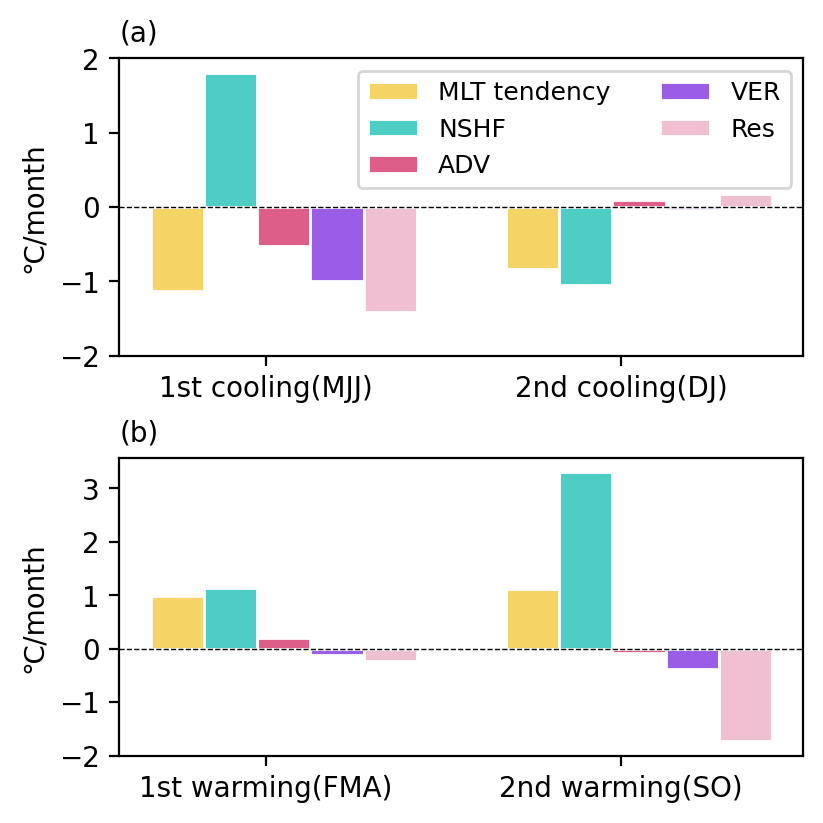

In [9]:
'''fig6'''
groups = ('1st cooling(MJJ)', '2nd cooling(DJ)', '1st warming(FMA)', '2nd warming(SO)',)
month=MLT_tendency_1d.groupby('time');
group=(month[5]+month[6]+month[7])/3,(month[12]+month[1])/2,(month[2]+month[3]+month[4])/3, (month[9]+month[10])/2
y1 = (group)
month=NSHF_1d.groupby('time');
group=(month[5]+month[6]+month[7])/3,(month[12]+month[1])/2, (month[2]+month[3]+month[4])/3, (month[9]+month[10])/2
y2 = (group);
month=ADV_1d.groupby('time');
group=(month[5]+month[6]+month[7])/3,(month[12]+month[1])/2, (month[2]+month[3]+month[4])/3, (month[9]+month[10])/2
y3 = (group)
month=VER_1d.groupby('time');
group=(month[5]+month[6]+month[7])/3,(month[12]+month[1])/2, (month[2]+month[3]+month[4])/3, (month[9]+month[10])/2
y4 = (group)
month=(MLT_tendency_1d-NSHF_1d-ADV_1d-VER_1d).groupby('time');
group=(month[5]+month[6]+month[7])/3,(month[12]+month[1])/2, (month[2]+month[3]+month[4])/3, (month[9]+month[10])/2
y5 = ((month[5]+month[6]+month[7])/3,(month[1]+month[12])/2, (month[2]+month[3]+month[4])/3, (+month[9]+month[10])/2)

# 柱子宽度
bar_width = 0.12

# 柱子位置
r1 = np.arange(0.2,4.2,0.8)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

macaron_colors = ['#9B5DE5', '#F6D365', '#4ECDC4', '#DD5E89','#efc0d2']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(4,4),  dpi=200,#sharey=True,
                        constrained_layout=True)

# 创建柱状图
plt.subplot(2,1,1)
plt.bar(r1[0:2], y1[0:2], color=macaron_colors[1], width=bar_width, edgecolor='white', label='MLT tendency',)
plt.bar(r2[0:2], y2[0:2], color=macaron_colors[2], width=bar_width, edgecolor='white', label='NSHF')
plt.bar(r3[0:2], y3[0:2], color=macaron_colors[3], width=bar_width, edgecolor='white', label='ADV')
plt.bar(r4[0:2], y4[0:2], color=macaron_colors[0], width=bar_width, edgecolor='white', label='VER')
plt.bar(r5[0:2], y5[0:2], color=macaron_colors[4], width=bar_width, edgecolor='white', label='Res')
plt.title('(a)',fontsize=10,loc='left')
plt.axhline(y=0, color='k', linestyle='--',lw=0.5)
plt.yticks(np.arange(-2, 3, 1))
plt.xticks(np.arange(0.4, 1.6, 0.8),groups[0:2])
# 添加标签
plt.ylabel('℃/month')#plt.title('cooling stage')
plt.legend(loc='upper right',ncol=2,fontsize=9)

plt.subplot(2,1,2)
plt.bar(r1[0:2], y1[2:], color=macaron_colors[1], width=bar_width, edgecolor='white', label='mlt tendency',)
plt.bar(r2[0:2], y2[2:], color=macaron_colors[2], width=bar_width, edgecolor='white', label='NSHF')
plt.bar(r3[0:2], y3[2:], color=macaron_colors[3], width=bar_width, edgecolor='white', label='ADV')
plt.bar(r4[0:2], y4[2:], color=macaron_colors[0], width=bar_width, edgecolor='white', label='VER')
plt.bar(r5[0:2], y5[2:], color=macaron_colors[4], width=bar_width, edgecolor='white', label='Res')
plt.title('(b)',fontsize=10,loc='left')
plt.axhline(y=0, color='k', linestyle='--',lw=0.5)
plt.yticks(np.arange(-2, 4, 1))
# 添加标签#plt.xlabel('Group')
plt.ylabel('℃/month')#plt.title('cooling stage')
plt.xticks(np.arange(0.4, 1.6, 0.8), groups[2:])

# 显示图形
plt.show()